In [3]:
#Load the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Load the dataset
df = pd.read_csv('Concrete_Data.csv')

In [85]:
#view data
df

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [17]:
#basic inforamtion on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [35]:
# assigning a variable to the list of columns
col = df.columns.tolist()
col

['Cement',
 'Blast',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'CA',
 'FA',
 'Age',
 'CMS']

In [99]:
#computing the number of zeroes in each variable
(df[col] == 0).sum()

Cement                0
Blast               471
Fly Ash             566
Water                 0
Superplasticizer    379
CA                    0
FA                    0
Age                   0
CMS                   0
dtype: int64

In [15]:
#basic statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CA,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FA,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CMS,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [40]:
# checking the skewness of the distribution of variables
df[col].skew()

Cement              0.509481
Blast               0.800717
Fly Ash             0.537354
Water               0.074628
Superplasticizer    0.907203
CA                 -0.040220
FA                 -0.253010
Age                 3.269177
CMS                 0.416977
dtype: float64

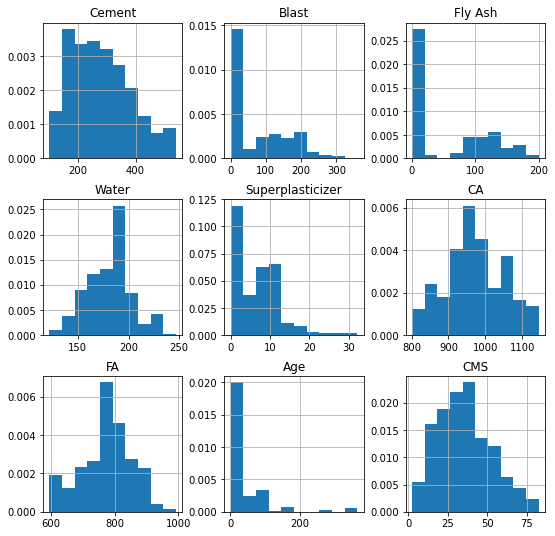

In [102]:
#the distribution of all the variables
df.hist(figsize=(9,9), density=True)
plt.show()

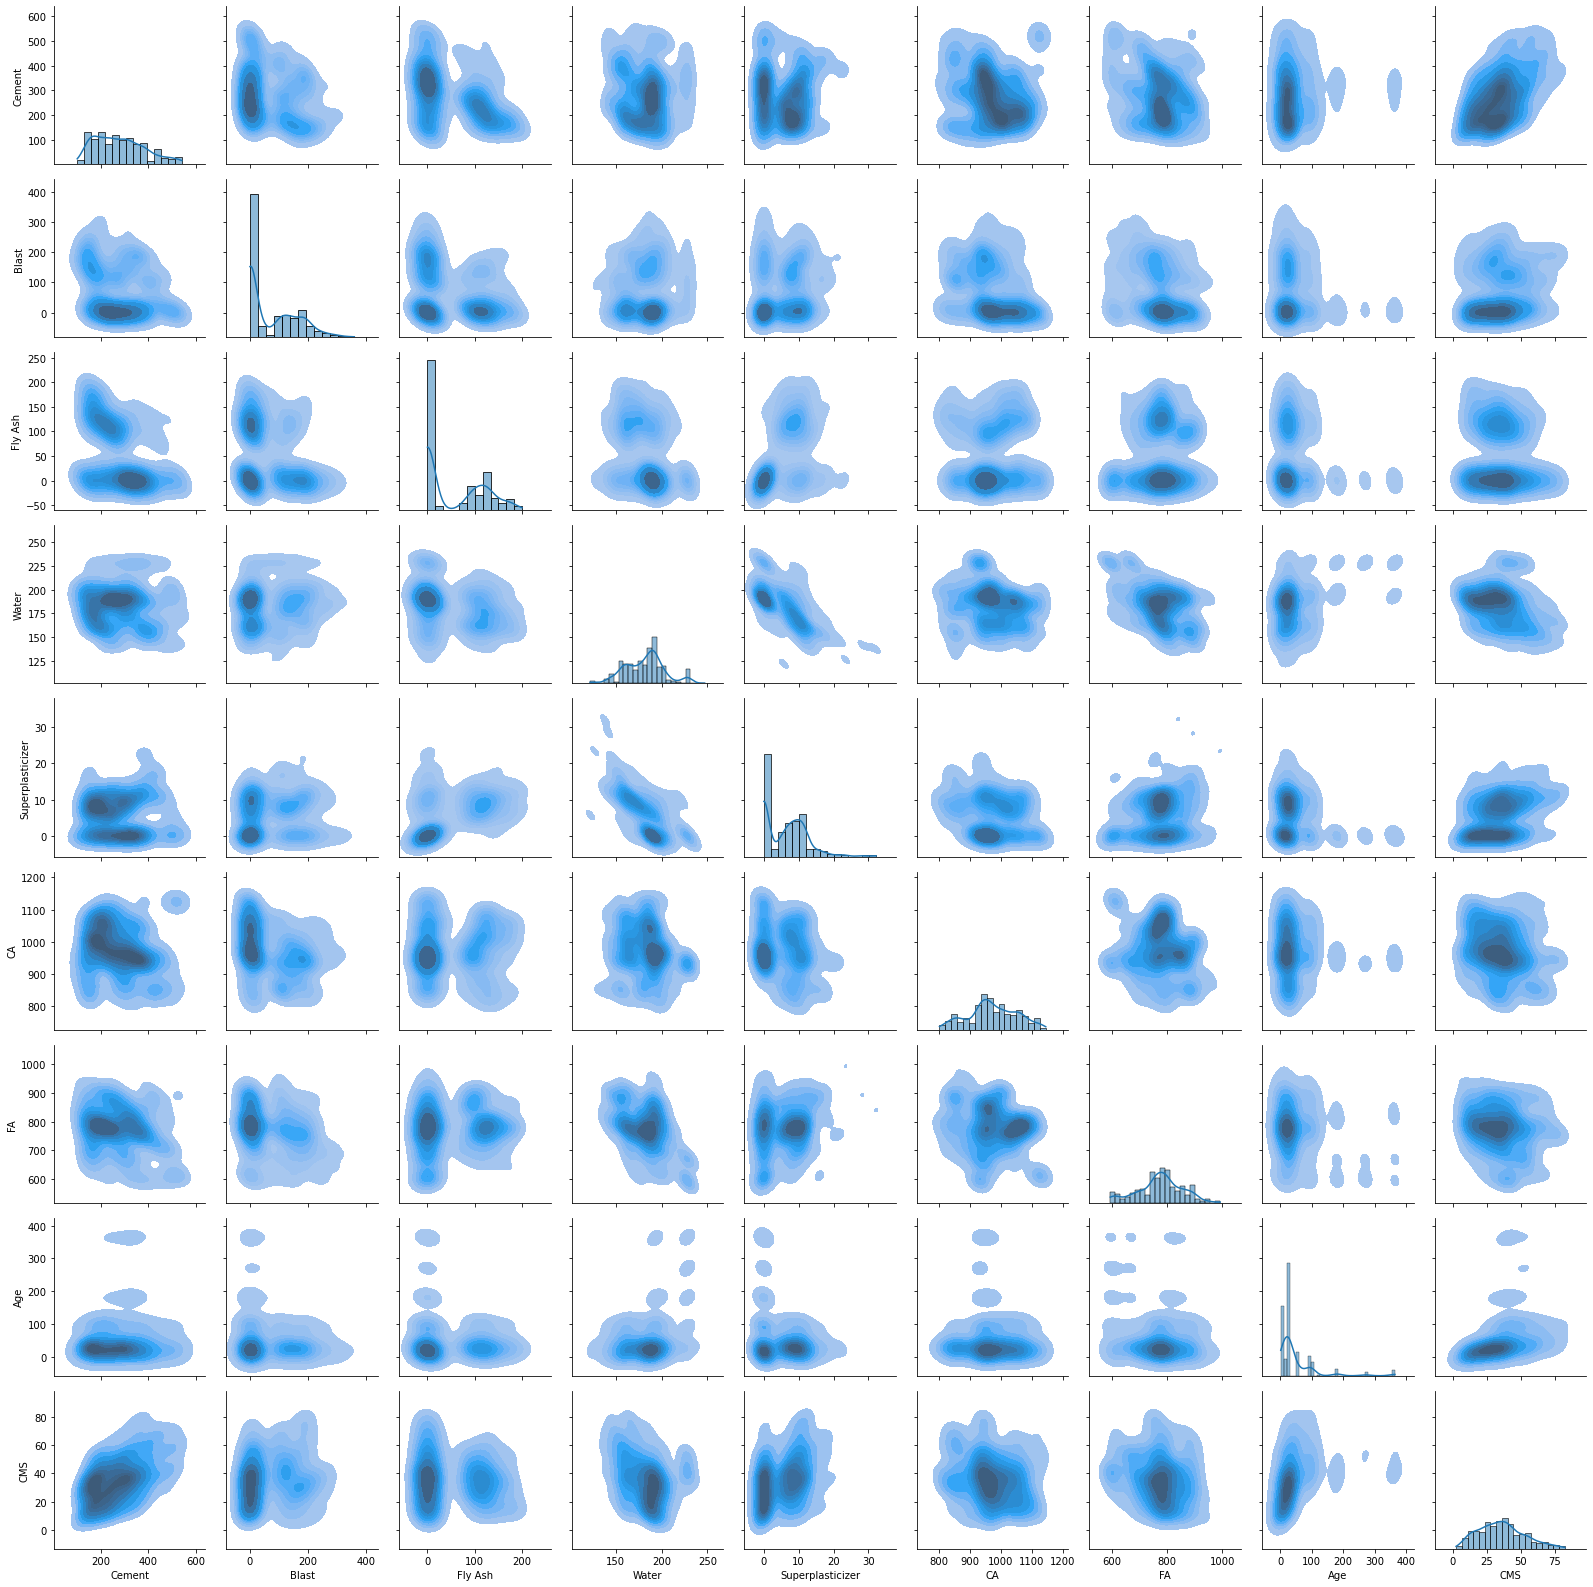

In [124]:
#pairpot plots pairwise relationships in the dataset
c = sns.PairGrid(df)
c.map_upper(sns.kdeplot, fill=True)
c.map_lower(sns.kdeplot, fill=True)
c.map_diag(sns.histplot, kde=True)

Text(0.5, 1.0, 'Distribution of cement')

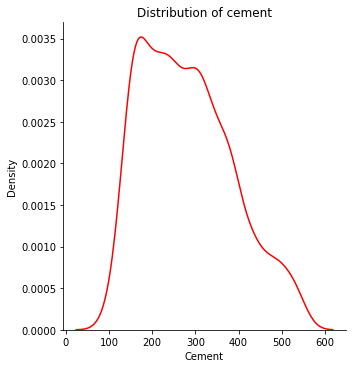

In [134]:
#distribution of cement variable
sns.displot(df, x="Cement", kind="kde", color='r')
plt.title('Distribution of cement')

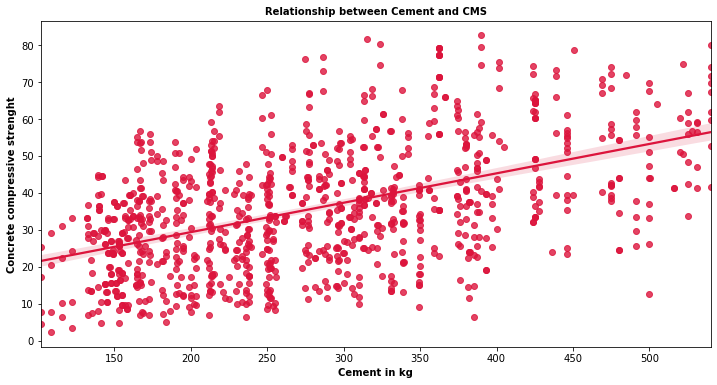

In [135]:
# Plot with regression line
plt.figure(figsize = (12,6))
sns.regplot(data=df, x = 'Cement', y='CMS', color='crimson')
plt.title('Relationship between Cement and CMS', weight = 'bold', fontsize = 10)
plt.xlabel('Cement in kg', weight = 'bold')
plt.ylabel('Concrete compressive strenght', weight = 'bold')
plt.show()

In [61]:
#correlation function
#To identify the correlation between the variables
df.corr()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


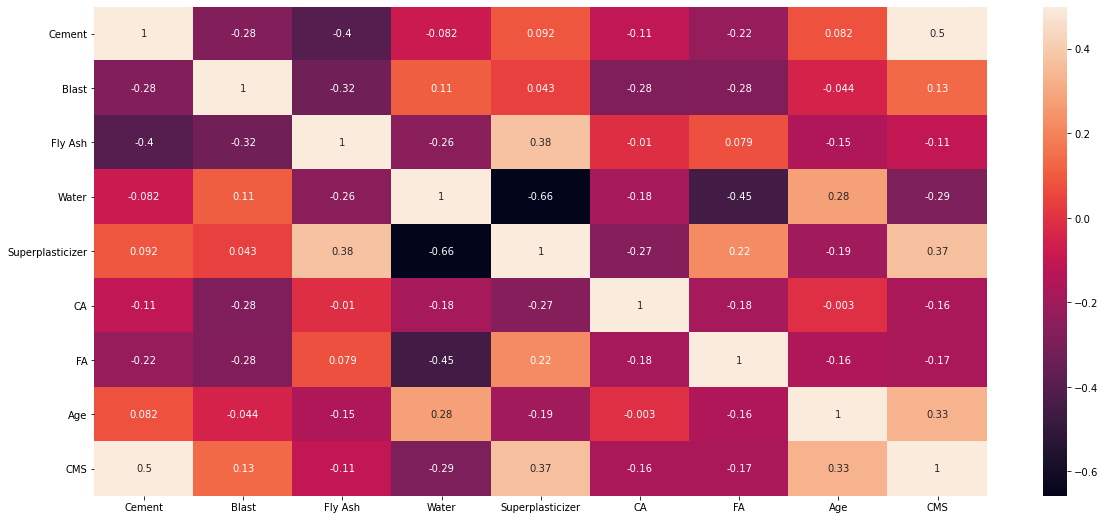

In [60]:
#heatmap for correlation
cor = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cor, vmax=.5, annot=True);

In [58]:
#kurtosis values
#identifies which variables have high number of outliers
df.kurt().sort_values(ascending = False)

Age                 12.168989
Superplasticizer     1.411269
Water                0.122082
FA                  -0.102177
CMS                 -0.313725
Blast               -0.508175
Cement              -0.520652
CA                  -0.599016
Fly Ash             -1.328746
dtype: float64

<AxesSubplot:>

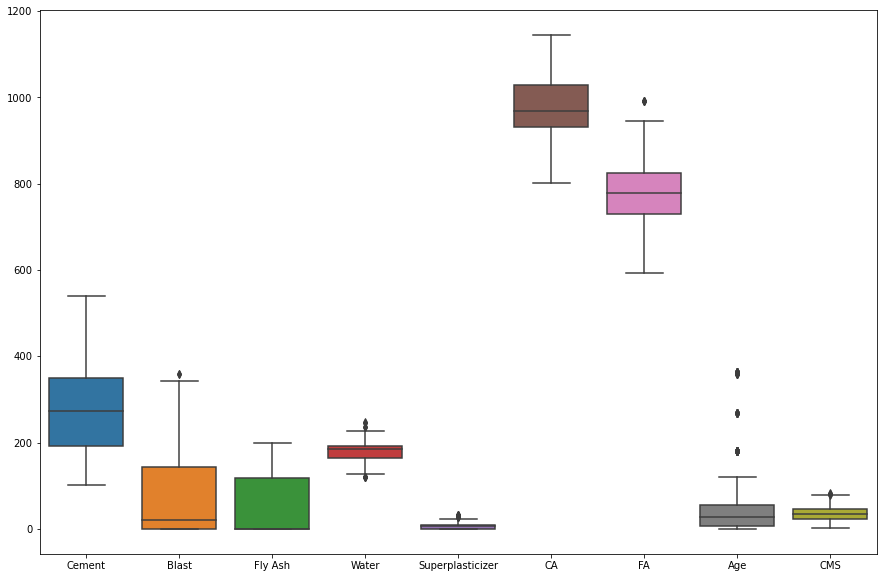

In [8]:
#Boxplot for all the variables
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [128]:
#Defining x and y variable
X = df.drop('CMS',axis=1).to_numpy()
y = df['CMS'].to_numpy()

#Creating Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

#Scaling the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [129]:
#Script for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn import metrics  

for name,method in [('Linear Regression', LinearRegression(n_jobs=-1))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)

print('Method: {}'.format(name))   

#Coefficents
print('\nIntercept: {:0.2f}'.format(float(method.intercept_)))
coeff_table=pd.DataFrame(np.transpose(method.coef_),df.drop('CMS',axis=1).columns,columns=['Coefficients'])
print('\n')
print(coeff_table)
    
#MAE,MSE and RMSE
print('\nR2: {:0.2f}'.format(metrics.r2_score(y_test, predict)))
print('Mean Absolute Error: {:0.2f}'.format(metrics.mean_absolute_error(y_test, predict)))  
print('Mean Squared Error: {:0.2f}'.format(metrics.mean_squared_error(y_test, predict)))  
print('Root Mean Squared Error: {:0.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, predict))))

Method: Linear Regression

Intercept: 35.95


                  Coefficients
Cement               13.027382
Blast                 8.952089
Fly Ash               5.955866
Water                -2.849777
Superplasticizer      1.737942
CA                    1.592146
FA                    2.035610
Age                   7.219311

R2: 0.62
Mean Absolute Error: 8.26
Mean Squared Error: 113.18
Root Mean Squared Error: 10.64


In [130]:
#Forecast Table
pred = predict.T
diff = pred-y_test
Table=pd.DataFrame({'Actual':y_test,'Predicted':pred.round(1),'Difference':diff.round(1)})
print('\nForecast Table')
Table.head()


Forecast Table


,Actual,Predicted,Difference
0,68.10,61.1,-7.0
1,71.30,53.6,-17.7
2,25.18,22.3,-2.9
3,19.52,27.9,8.3
4,38.02,51.6,13.6
